Analysis of Streaming Providers (Netflix,Hulu,Prime Video and Disney+)
#UCDPA_ShannonBurke

In [1]:
#Importing packages to be used throughout analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # Data Visualisation built on Matplotlib

Subscriptions for Streaming Providers

In [3]:
#Create Panda Dataframe from dictionary-information for dictionary obtained from:https://www.cnbc.com/2021/11/10/disney-netflix-and-other-streaming-services-subs-arpu-q3-2021.html
subscriptions = pd.DataFrame({"Streaming Providers":["Netflix","Hulu","Prime Video","Disney+"],
                              "Subscriptions (Million)":[214,39.7,175,118.1]})
subscriptions = pd.DataFrame(subscriptions).set_index('Streaming Providers')
print(subscriptions)

                     Subscriptions (Million)
Streaming Providers                         
Netflix                                214.0
Hulu                                    39.7
Prime Video                            175.0
Disney+                                118.1


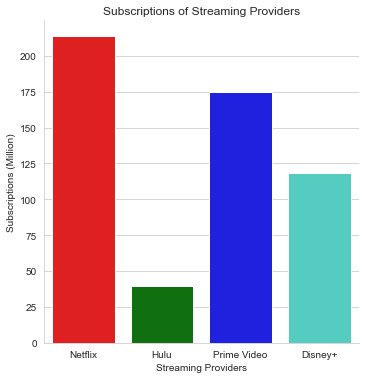

In [5]:
#Plotting barplot to display subscriptions of streaming providers
streaming_color= ["red","green","blue","turquoise"]
sns.set_style("whitegrid")
sns.catplot(data=subscriptions,x=subscriptions.index,y="Subscriptions (Million)",kind="bar")
sns.set_palette(sns.color_palette(streaming_color))
plt.title("Subscriptions of Streaming Providers")
plt.show()
#snipped graph rather than fig.savefig("Subscritions of Streaming Providers.png") and will for futher graphs due to size of graphs

Analysis of Streaming Provider content 

In [9]:
#Importing CSV file obtained from Kaggle into Pandas DataFrame and using column ID as index label
movies =pd.read_csv("MoviesOnStreamingPlatforms_updated.csv",index_col="ID")
print(movies.head())#to see layout of dataset

    Unnamed: 0                                     Title  Year  Age    IMDb  \
ID                                                                            
1            0                              The Irishman  2019  18+  7.8/10   
2            1                                    Dangal  2016   7+  8.4/10   
3            2  David Attenborough: A Life on Our Planet  2020   7+  9.0/10   
4            3         Lagaan: Once Upon a Time in India  2001   7+  8.1/10   
5            4                                      Roma  2018  18+  7.7/10   

   Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
ID                                                              
1           98/100        1     0            0        0     0   
2           97/100        1     0            0        0     0   
3           95/100        1     0            0        0     0   
4           94/100        1     0            0        0     0   
5           94/100        1     0            0        0 

In [10]:
#Cleaning and preparing data for analysis

In [11]:
movies.info()#To show what are the column names,data types of each column and null count of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9515 entries, 1 to 9515
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   object 
 5   Rotten Tomatoes  9508 non-null   object 
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(1), int64(7), object(8)
memory usage: 1.2+ MB


In [12]:
#Removing Unnamed column as using ID index and no benefit to have column in dataset
movies=movies.drop(['Unnamed: 0'],axis=1)
print(movies.head())

                                       Title  Year  Age    IMDb  \
ID                                                                
1                               The Irishman  2019  18+  7.8/10   
2                                     Dangal  2016   7+  8.4/10   
3   David Attenborough: A Life on Our Planet  2020   7+  9.0/10   
4          Lagaan: Once Upon a Time in India  2001   7+  8.1/10   
5                                       Roma  2018  18+  7.7/10   

   Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
ID                                                              
1           98/100        1     0            0        0     0   
2           97/100        1     0            0        0     0   
3           95/100        1     0            0        0     0   
4           94/100        1     0            0        0     0   
5           94/100        1     0            0        0     0   

                                            Directors  \
ID               

In [14]:
# To check for missing data 
missing_data = movies.isna().sum().sort_values(ascending=False)
print(missing_data)

Age                4177
Directors           411
Runtime             319
Language            313
Country             254
IMDb                206
Genres              116
Rotten Tomatoes       7
Title                 0
Year                  0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64


In [15]:
#To add values to pre-existing column that has no beneficial data, in preperation for combing datasets
movies=movies.assign(Type='Movie')

In [17]:
#To check for duplicates in Movies dataframe
duplicate_movies = movies['Title'].duplicated().any()
print(duplicate_movies)

False


In [18]:
#Importing secound dataset (Series) obtained from kaggle into a Pandas DataFrame and using ID column as index label
series = pd.read_csv("tv_shows.csv",index_col="ID")
print(series)

      Unnamed: 0                                  Title  Year  Age    IMDb  \
ID                                                                           
1              0                           Breaking Bad  2008  18+  9.4/10   
2              1                        Stranger Things  2016  16+  8.7/10   
3              2                        Attack on Titan  2013  18+  9.0/10   
4              3                       Better Call Saul  2015  18+  8.8/10   
5              4                                   Dark  2017  16+  8.8/10   
...          ...                                    ...   ...  ...     ...   
5713        5363                       Paradise Islands  2017  NaN     NaN   
5714        5364                         Mexico Untamed  2018  NaN     NaN   
5715        5365                  Wild Centeral America  2020  NaN     NaN   
5716        5366                            Wild Russia  2018  NaN     NaN   
5717        5367  Fearless Adventures with Jack Randall  2018  N

In [19]:
#To check column names and data types 
series.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 1 to 5717
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   Title            5368 non-null   object
 2   Year             5368 non-null   int64 
 3   Age              3241 non-null   object
 4   IMDb             4406 non-null   object
 5   Rotten Tomatoes  5368 non-null   object
 6   Netflix          5368 non-null   int64 
 7   Hulu             5368 non-null   int64 
 8   Prime Video      5368 non-null   int64 
 9   Disney+          5368 non-null   int64 
 10  Type             5368 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 503.2+ KB


In [20]:
#Checking for any missing data 
missing_dataseries = series.isna().sum().sort_values(ascending=False)
print(missing_dataseries)

Age                2127
IMDb                962
Unnamed: 0            0
Title                 0
Year                  0
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64


In [21]:
#Checking for duplicates
duplicate_series = series['Title'].duplicated().any()
print(duplicate_series)

False


In [22]:
#Removing Unnamed column as using ID index and no benefit to have column in dataset
series = series.drop(['Unnamed: 0'],axis=1)
print(series.head())

               Title  Year  Age    IMDb Rotten Tomatoes  Netflix  Hulu  \
ID                                                                       
1       Breaking Bad  2008  18+  9.4/10         100/100        1     0   
2    Stranger Things  2016  16+  8.7/10          96/100        1     0   
3    Attack on Titan  2013  18+  9.0/10          95/100        1     1   
4   Better Call Saul  2015  18+  8.8/10          94/100        1     0   
5               Dark  2017  16+  8.8/10          93/100        1     0   

    Prime Video  Disney+  Type  
ID                              
1             0        0     1  
2             0        0     1  
3             0        0     1  
4             0        0     1  
5             0        0     1  


In [23]:
#To add value to an already existing column that had nil value , in preperation for combining data 
series = series.assign(Type='Series')
print(series.head())

               Title  Year  Age    IMDb Rotten Tomatoes  Netflix  Hulu  \
ID                                                                       
1       Breaking Bad  2008  18+  9.4/10         100/100        1     0   
2    Stranger Things  2016  16+  8.7/10          96/100        1     0   
3    Attack on Titan  2013  18+  9.0/10          95/100        1     1   
4   Better Call Saul  2015  18+  8.8/10          94/100        1     0   
5               Dark  2017  16+  8.8/10          93/100        1     0   

    Prime Video  Disney+    Type  
ID                                
1             0        0  Series  
2             0        0  Series  
3             0        0  Series  
4             0        0  Series  
5             0        0  Series  


In [24]:
#Joining the two datasets 
streaming = pd.concat([movies,series],ignore_index=True)
print(streaming)

                                          Title  Year  Age    IMDb  \
0                                  The Irishman  2019  18+  7.8/10   
1                                        Dangal  2016   7+  8.4/10   
2      David Attenborough: A Life on Our Planet  2020   7+  9.0/10   
3             Lagaan: Once Upon a Time in India  2001   7+  8.1/10   
4                                          Roma  2018  18+  7.7/10   
...                                         ...   ...  ...     ...   
14878                          Paradise Islands  2017  NaN     NaN   
14879                            Mexico Untamed  2018  NaN     NaN   
14880                     Wild Centeral America  2020  NaN     NaN   
14881                               Wild Russia  2018  NaN     NaN   
14882     Fearless Adventures with Jack Randall  2018  NaN     NaN   

      Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+    Type  \
0              98/100        1     0            0        0   Movie   
1              97/1

Distribution of content on each streaming platform 

In [26]:
#Preperation of plotting pie graph, count each movie/series allocated in each streaming provider
platform = ['Netflix','Hulu','Prime Video','Disney+']
for i in platform:
    print ('Platform{} Count: {}'.format(i,streaming[i].sum()))

PlatformNetflix Count: 5666
PlatformHulu Count: 2668
PlatformPrime Video Count: 5944
PlatformDisney+ Count: 1273


In [27]:
#Create a list of the counts
platform_count = [streaming[i].sum() for i in platform]
print(platform_count)

[5666, 2668, 5944, 1273]


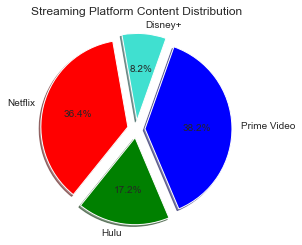

In [28]:
explode = (0.1,0.1,0.1,0.1) # To apply to each streaming content to show count as percentage
#plotting
fig, ax= plt.subplots()
ax.pie(platform_count ,
      labels = platform,
       autopct = '%1.1f%%',
      explode = explode,
      shadow = True,
      startangle = 100)
ax.set_title("Streaming Platform Content Distribution")
ax.axis = ('equal')
plt.show()

Did COVID 19 have an impact /delayed effect on release of content

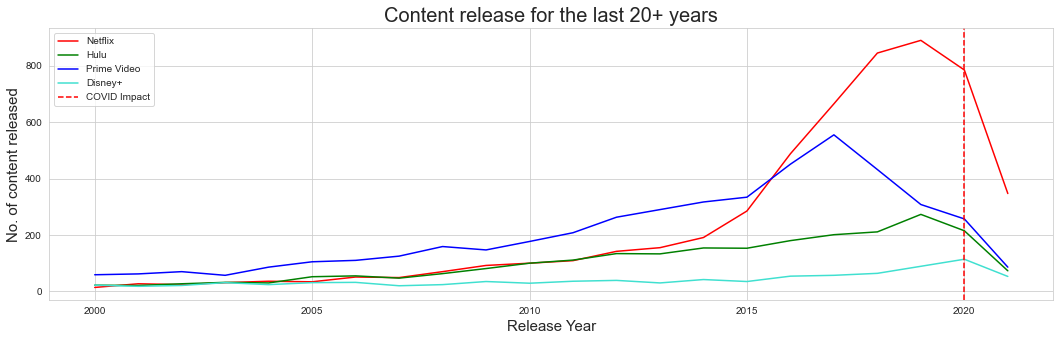

In [29]:
#Subset data for last 20 years 
post_2000 = streaming[streaming.Year >=2000]
content_year = post_2000.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()
#plotting 
plt.figure(figsize=(18, 5))
sns.lineplot(x=content_year.index,y=content_year['Netflix'],label='Netflix')
sns.lineplot(x=content_year.index,y=content_year['Hulu'],label='Hulu')
sns.lineplot(x=content_year.index,y=content_year['Prime Video'],label='Prime Video')
sns.lineplot(x=content_year.index,y=content_year['Disney+'],label='Disney+')
plt.axvline(x=2020 , label='COVID Impact', linestyle = '--')
plt.xlabel('Release Year',fontsize=15)
plt.ylabel('No. of content released',fontsize = 15)
plt.title('Content release for the last 20+ years',fontsize=20)
plt.legend()
plt.show()

Checking for overlap of content across the streaming providers

In [30]:
#Netflix and Hulu comparison
overlap_NxHu = streaming[["Title","Netflix","Hulu"]]
overlap_NxHu = overlap_NxHu[overlap_NxHu['Netflix']==1]
overlap_NxHu = overlap_NxHu[overlap_NxHu['Hulu']==1]
print(overlap_NxHu.count())

Title      167
Netflix    167
Hulu       167
dtype: int64


In [32]:
#Netflix and Prime Video 
overlap_NxPv = streaming[["Title","Netflix","Prime Video"]]
overlap_NxPv = overlap_NxPv[overlap_NxPv['Netflix']==1]
overlap_NxPv = overlap_NxPv[overlap_NxPv['Prime Video']==1]
print(overlap_NxPv.count())

Title          215
Netflix        215
Prime Video    215
dtype: int64


In [33]:
#Netflix and Disney 
overlap_NxD = streaming[["Title","Netflix","Disney+"]]
overlap_NxD = overlap_NxD[overlap_NxD['Netflix']==1]
overlap_NxD = overlap_NxD[overlap_NxD['Disney+']==1]
print(overlap_NxD.count())

Title      17
Netflix    17
Disney+    17
dtype: int64


In [34]:
#Hulu and Prime Video
overlap_HuPv = streaming[["Title","Hulu","Prime Video"]]
overlap_HuPv = overlap_HuPv[overlap_HuPv["Hulu"]==1]
overlap_HuPv = overlap_HuPv[overlap_HuPv["Prime Video"]==1]
print(overlap_HuPv.count())

Title          259
Hulu           259
Prime Video    259
dtype: int64


In [35]:
#Hulu and Disney+
overlap_HuD = streaming[["Title","Hulu","Disney+"]]
overlap_HuD = overlap_HuD[overlap_HuD["Hulu"]==1]
overlap_HuD = overlap_HuD[overlap_HuD["Disney+"]==1]
print(overlap_HuD.count())

Title      41
Hulu       41
Disney+    41
dtype: int64


In [36]:
#Prime Video and Disney+
overlap_PvD = streaming[["Title","Prime Video","Disney+"]]
overlap_PvD = overlap_PvD[overlap_PvD["Prime Video"]==1]
overlap_PvD = overlap_PvD[overlap_PvD["Disney+"]==1]
print(overlap_PvD.count())

Title          16
Prime Video    16
Disney+        16
dtype: int64


In [38]:
#Netflix,Hulu and Prime Video
overlap_NxHuPv = streaming[["Title","Netflix","Hulu","Prime Video"]]
overlap_NxHuPv = overlap_NxHuPv[overlap_NxHuPv["Netflix"]==1]
overlap_NxHuPv = overlap_NxHuPv[overlap_NxHuPv["Hulu"]==1]
overlap_NxHuPv = overlap_NxHuPv[overlap_NxHuPv["Prime Video"]==1]
print(overlap_NxHuPv.count())

Title          40
Netflix        40
Hulu           40
Prime Video    40
dtype: int64


In [39]:
#Overlap of all 4 platforms
overlap_NxHuPvD = streaming[["Title","Netflix","Hulu","Prime Video","Disney+"]]
overlap_NxHuPvD = overlap_NxHuPvD[overlap_NxHuPvD["Netflix"]==1]
overlap_NxHuPvD = overlap_NxHuPvD[overlap_NxHuPvD["Hulu"]==1]
overlap_NxHuPvD = overlap_NxHuPvD[overlap_NxHuPvD["Prime Video"]==1]
overlap_NxHuPvD = overlap_NxHuPvD[overlap_NxHuPvD["Disney+"]==1]
print(overlap_NxHuPvD)

        Title  Netflix  Hulu  Prime Video  Disney+
1330   Zapped        1     1            1        1
11630  Genius        1     1            1        1


In [40]:
# Slicing and subsetting with loc to obtain full information on two titles across all streaming services
overlap_full_data = streaming.loc[[1330,11630]]
print (overlap_full_data)

        Title  Year  Age    IMDb Rotten Tomatoes  Netflix  Hulu  Prime Video  \
1330   Zapped  2014  all  5.2/10          59/100        1     1            1   
11630  Genius  2017  16+  8.3/10          74/100        1     1            1   

       Disney+    Type    Directors           Genres Country Language  Runtime  
1330         1   Movie  Atlee Kumar  Action,Thriller   India    Tamil    172.0  
11630        1  Series          NaN              NaN     NaN      NaN      NaN  


Which platform contains the most content with the highest ratings by IMDb and Rotten Tomatoes

In [41]:
#IMDb-to find the top 50 rated titles and which platform has rights to 
IMDb_rating = streaming.copy()
IMDb_ratings = IMDb_rating[["Title","IMDb","Netflix","Hulu","Prime Video","Disney+","Type"]]
IMDb_ratings['IMDb']= IMDb_ratings['IMDb'].str.split('/').str[0]
IMDb_ratings= IMDb_ratings.sort_values("IMDb",ascending=False)
top50_IMDb_ratings= IMDb_ratings.head(50)
print(top50_IMDb_ratings)

                                                 Title IMDb  Netflix  Hulu  \
6750                  Ruby's Studio: the Feelings Show  9.8        0     0   
6775                         Ostatni ludzie Czarnobyla  9.7        0     0   
13317                The Secret World of Nature: Spain  9.6        0     0   
9396                                       Jingle Pols  9.6        0     0   
14592                                            Bluey  9.6        0     0   
13126                                     Malgudi Days  9.5        0     0   
9515                                      Breaking Bad  9.4        1     0   
14792                             Alaska Animal Rescue  9.4        0     0   
9595                                        Our Planet  9.3        1     0   
13275                                  Everyday Driver  9.3        0     0   
9520                        Avatar: The Last Airbender  9.3        1     0   
12630                                     Hungry Henry  9.3     

<ipython-input-41-8dadedd28de2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IMDb_ratings['IMDb']= IMDb_ratings['IMDb'].str.split('/').str[0]


In [43]:
#To obtain count of the top 50 rated by IMDb content across the platforms
for i in platform:
    print ('Platform{} Count: {}'.format(i,top50_IMDb_ratings[i].sum()))

PlatformNetflix Count: 18
PlatformHulu Count: 14
PlatformPrime Video Count: 18
PlatformDisney+ Count: 9


In [44]:
#Rotten Tomatoes-to find the top 50 rated titles and which platform has rights to 
rt_rating = streaming.copy()
rt_ratings = rt_rating[["Title","Rotten Tomatoes","Netflix","Hulu","Prime Video","Disney+","Type"]]
rt_ratings['Rotten Tomatoes']= rt_ratings['Rotten Tomatoes'].str.split('/').str[0]
rt_ratings= rt_ratings.sort_values("Rotten Tomatoes",ascending=False)
top50_rt_ratings= rt_ratings.head(50)
print(top50_rt_ratings)

                                                   Title Rotten Tomatoes  \
0                                           The Irishman              98   
1                                                 Dangal              97   
8615                                        Mary Poppins              96   
9516                                     Stranger Things              96   
14572                                               Loki              95   
9517                                     Attack on Titan              95   
2               David Attenborough: A Life on Our Planet              95   
5                      To All the Boys I've Loved Before              94   
14573                                    The Mandalorian              94   
9518                                    Better Call Saul              94   
3                      Lagaan: Once Upon a Time in India              94   
3695                                     The Dark Knight              94   
4           

<ipython-input-44-40793791b68b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_ratings['Rotten Tomatoes']= rt_ratings['Rotten Tomatoes'].str.split('/').str[0]


In [45]:
#To obtain count of top 50 rated by Rotten Tomatoes across the platforms
for i in platform:
    print ('Platform{} Count: {}'.format(i,top50_rt_ratings[i].sum()))

PlatformNetflix Count: 29
PlatformHulu Count: 12
PlatformPrime Video Count: 12
PlatformDisney+ Count: 5


In [46]:
#To create a datframe from dictionary of IMDb and Rotten Tomatoes count of the top top rated
top_rated=pd.DataFrame({"Label":["Netflix","Hulu","Prime Video","Disney+"],
                        "IMDb":[18,14,18,9],
                       "Rotten Tomatoes":[29,12,12,5]})
top_rated_df = pd.DataFrame(top_rated).set_index('Label')
print(top_rated_df)

             IMDb  Rotten Tomatoes
Label                             
Netflix        18               29
Hulu           14               12
Prime Video    18               12
Disney+         9                5


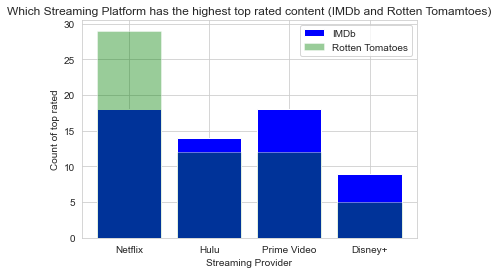

In [76]:
#Plotting Multiple bar charts(Grouped Bar chart)using Matplotlib 
fig, ax = plt.subplots()
ax.bar(top_rated_df.index,top_rated_df['IMDb'],label="IMDb",color='b');
ax.bar(top_rated_df.index,top_rated_df['Rotten Tomatoes'],label="Rotten Tomatoes",alpha=0.4,color='g');
ax.set_title("Which Streaming Platform has the highest top rated content (IMDb and Rotten Tomamtoes)")
ax.set_xlabel("Streaming Provider")
ax.set_ylabel("Count of top rated")
ax.legend();
plt.show()

Analysing Age ratings in content 

In [56]:
#Creating a subset from streaming dataframe
age_df = streaming.copy()
age_df = age_df[["Title","Age"]]
print(age_df)

                                          Title  Age
0                                  The Irishman  18+
1                                        Dangal   7+
2      David Attenborough: A Life on Our Planet   7+
3             Lagaan: Once Upon a Time in India   7+
4                                          Roma  18+
...                                         ...  ...
14878                          Paradise Islands  NaN
14879                            Mexico Untamed  NaN
14880                     Wild Centeral America  NaN
14881                               Wild Russia  NaN
14882     Fearless Adventures with Jack Randall  NaN

[14883 rows x 2 columns]


In [57]:
age_df1 = age_df.dropna()
print(age_df1)

                                          Title  Age
0                                  The Irishman  18+
1                                        Dangal   7+
2      David Attenborough: A Life on Our Planet   7+
3             Lagaan: Once Upon a Time in India   7+
4                                          Roma  18+
...                                         ...  ...
14855       Howie Mandel's Animals Doing Things  all
14856                               The Big Fib  all
14857              Vampirina: Ghoul Girls Rock!  all
14863                             Party Animals  all
14872                 Weirdest, Bestest, Truest  all

[8579 rows x 2 columns]


In [59]:
#Looping and itterows - i.e adding two categories to the dataset 
for lab, row in age_df1.iterrows():
    if "18+" in row ["Age"]:
        age_df1.loc[lab,"Age Rating"]="Over 18"
    else:
        age_df1.loc[lab,"Age Rating"]="Under 18"
        
print(age_df1)

C:\Users\shann\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\shann\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


                                          Title  Age Age Rating
0                                  The Irishman  18+    Over 18
1                                        Dangal   7+   Under 18
2      David Attenborough: A Life on Our Planet   7+   Under 18
3             Lagaan: Once Upon a Time in India   7+   Under 18
4                                          Roma  18+    Over 18
...                                         ...  ...        ...
14855       Howie Mandel's Animals Doing Things  all   Under 18
14856                               The Big Fib  all   Under 18
14857              Vampirina: Ghoul Girls Rock!  all   Under 18
14863                             Party Animals  all   Under 18
14872                 Weirdest, Bestest, Truest  all   Under 18

[8579 rows x 3 columns]


In [60]:
#Count of over 18 
over18 = age_df1[age_df1["Age Rating"]=='Over 18']
print(over18.count())

Title         3130
Age           3130
Age Rating    3130
dtype: int64


In [61]:
#Count of under 18 
under18 = age_df1[age_df1["Age Rating"]=='Under 18']
print(under18.count())

Title         5449
Age           5449
Age Rating    5449
dtype: int64


In [62]:
#Creating custom reusable code to get % of data set for two age categories added
def custom_1(a):
    percentage = (a/age_df1.shape[0])*100
    return percentage

In [63]:
#Percentage using reuseable code for over 18 category
(custom_1(3130))

36.48443874577457

In [64]:
#Percentage using reuseable code for under 18 category
(custom_1(5449))

63.51556125422544

Historical Stock Price data (2019-2021)

Information obtained from Yahoo Finance

In [48]:
#Importing stock csv's files that contains monthly stock information (2019-2021)
nflx_stock = pd.read_csv("NFLX.csv",index_col="Date")
amzn_stock = pd.read_csv("AMZN.csv",index_col="Date")
dis_stock = pd.read_csv("DIS.csv",index_col="Date")

In [49]:
#Checking data 
print(amzn_stock)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  1465.199951  1736.410034  1460.930054  1718.729980  1718.729980   
2019-02-01  1638.880005  1673.060059  1566.760010  1639.829956  1639.829956   
2019-03-01  1655.130005  1823.750000  1586.569946  1780.750000  1780.750000   
2019-04-01  1800.109985  1956.339966  1798.729980  1926.520020  1926.520020   
2019-05-01  1933.089966  1964.400024  1772.699951  1775.069946  1775.069946   
2019-06-01  1760.010010  1935.199951  1672.000000  1893.630005  1893.630005   
2019-07-01  1922.979980  2035.800049  1849.439941  1866.780029  1866.780029   
2019-08-01  1871.719971  1897.920044  1743.510010  1776.290039  1776.290039   
2019-09-01  1770.000000  1853.660034  1709.219971  1735.910034  1735.910034   
2019-10-01  1746.000000  1798.849976  1685.060059  1776.660034  1776.660034   
2019-11-01  1788.010010  1824.689941  1722.709961  1

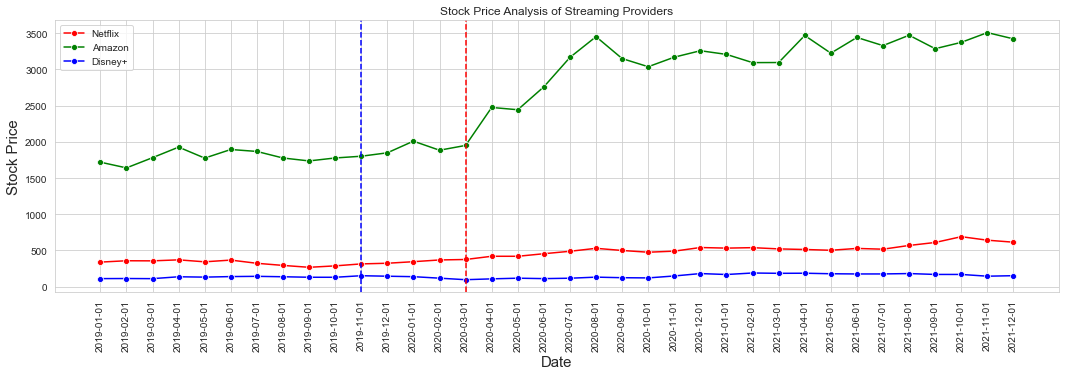

In [77]:
#Plotting stock close price of Amazon, Netflix and Disney with two vlines one showing date Disney+ platform released and COVID 19 announced as pandemic
plt.figure(figsize=(18, 5))
sns.lineplot(x=nflx_stock.index,y=nflx_stock["Close"],label="Netflix",marker='o')
sns.lineplot(x=amzn_stock.index,y=amzn_stock["Close"],label="Amazon",marker='o')
sns.lineplot(x=dis_stock.index,y=dis_stock["Close"],label="Disney+",marker='o')
plt.axvline(label="COVID",x='2020-03-01',linestyle='--',color='r')
plt.axvline(label="Disney+ Started",x='2019-11-01',linestyle='--',color='b')
plt.title('Stock Price Analysis of Streaming Providers')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.xticks(rotation=90);
plt.show()

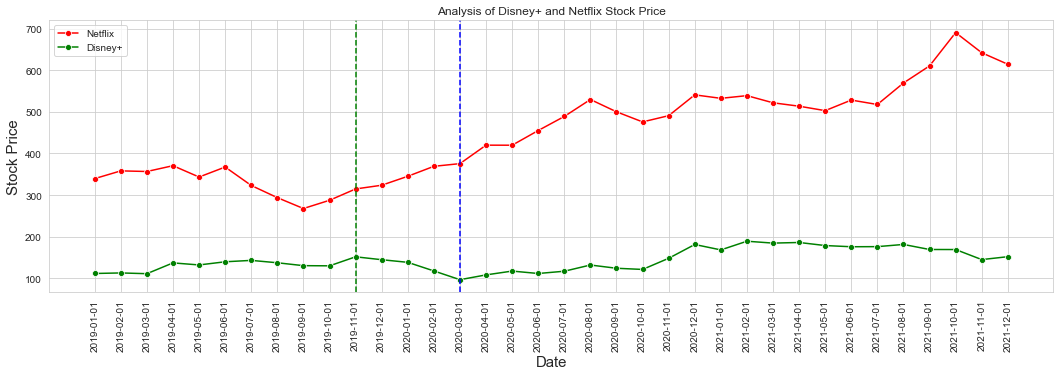

In [66]:
#Comparing Netflix and Disney+ stock information 
plt.figure(figsize=(18, 5))
sns.lineplot(x=nflx_stock.index,y=nflx_stock["Close"],label="Netflix",marker='o')
sns.lineplot(x=dis_stock.index,y=dis_stock["Close"],label="Disney+",marker='o')
plt.axvline(x='2020-03-01',label='COVID',linestyle='--',color='b')
plt.axvline(x='2019-11-01',label='Disney',linestyle='--',color='g')
plt.title('Analysis of Disney+ and Netflix Stock Price')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.xticks(rotation=90);
plt.show()

In [67]:
#Reuseable function to show growth of closing stock price from 2019 - 2021
def custom_2 (a,b):
    growth = (((b-a)/a)*100)
    return growth

In [68]:
#Netflix growth
custom_2(339.50,614.239990)

80.92488659793815

In [69]:
#Amazon growth
custom_2(1718.729980,3420.73990)

99.02718517774385

In [70]:
#Disney growth
custom_2(111.51997,151.88005)

36.1908992622577